In [ ]:
# Scenario: Retail – Customer Churn Prediction

# A retail company wants to predict whether customers will churn (1) or stay loyal (0) based on:

# Monthly spend (amount spent in store)
# Visits per month (frequency of shopping)
# Satisfaction score (1–10 scale)
# Why XGBoost?

# Handles messy real-world data (missing values, skewed distributions).
# Faster training compared to traditional Gradient Boosting.
# Regularization reduces overfitting, making predictions more robust
 


In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('retail_churn_200.csv')
df.head()

,Monthly_spend,Visits_per_month,Satisfaction_score,Churn
0,1226,7,3,0
1,1559,7,4,0
2,960,11,3,0
3,1394,4,1,0
4,1230,7,1,0


In [8]:
X = df[['Monthly_spend', 'Visits_per_month', 'Satisfaction_score']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb_model = XGBClassifier(
    n_estimators=50,       # number of trees
    learning_rate=0.1,     # step size
    max_depth=3,           # depth of trees
    random_state=42,
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 1.0


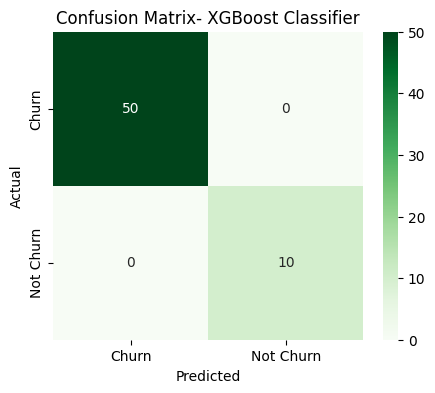

In [9]:
cm = confusion_matrix(y_test, y_pred)
Labels = ['Churn', 'Not Churn']
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix- XGBoost Classifier')
plt.show()